# Simulating the Chi-Squared Distribution

In this notebook, you will simulate the [chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) distribution $\chi^2_k$, where $k$ is an integer that is called the *degrees of freedom*. For this simulation, **do not** use `numpy.random.chisquare`; you will write you own function that generates $\chi^2_k$ random variates.

This distribution is defined in terms of the standard ($\mu=0.0$, $\sigma=1.0$) normal distribution:

$$Z \sim N(0.0,1.0) $$

$$ X \sim \sum_{i=1}^{k} Z_i^2 $$

In plain english:

> Draw $k$ standard normal random variables, square them all and take the sum. That will be a single random variable from $\chi^2_k$

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from ipywidgets import interact, fixed

## Simulating chi-squared

Write a function, `chi_squared`, that returns random numbers drawn from the $\chi^2_k$ distribution with degree of freedom $k$. In doing this, first draw random numbers from the standard normal distribution and then use those to generate the chi-squared random variates.

In [3]:
def yieldRandVar(k):
    randVar = np.random.normal(size=k)
    randVar *= randVar
    randVar = sum(randVar)
    return randVar

In [4]:
def chi_squared(k, size=1):
    """Return random numbers drawn from the chi-squared distribution.
    
    Parameters
    ----------
    k: int
        The degrees of freedom of the distribution.
    size: int
        The number of random numbers to return as an array.
    """
    L = [yieldRandVar(k) for x in range(size)]
    return np.array(L)

To test your distribution, draw 100 chi-squared random numbers for $k=7$ and print the mean and variance of the data and compare that with the expected mean and variance for $k=7$:

In [5]:
k = 7
size = 100

In [6]:
test = chi_squared(k, size)

In [7]:
expect = np.random.chisquare(k, size)

In [8]:
print('<Tested Description>')
print('Mean: ', np.mean(test))
print('Variance: ', np.var(test))
print('\n<Expected Description>')
print('Mean: ', np.mean(expect))
print('Variance: ', np.var(expect))

<Tested Description>
Mean:  7.01936260178
Variance:  14.3057464859

<Expected Description>
Mean:  7.1717440989
Variance:  13.8058770247


To visualize the $\chi^2_k$ distribution, write a function, `plot_chi_squared`, that makes an appropriately labeled histogram using Matplotlib. Normalize the histogram and customize the number of bins.

In [9]:
def plot_chi_squared(k, samples):
    """Plot the chi-squared distribution as a distplot with 300 points.
    
    k: int
        The k parameter of the chi-squared distributions.
    samples: int
        The number of samples to draw.
    """
    cs = chi_squared(k, samples)
    plt.hist(cs, normed=True, bins=100)
    plt.axes().set(title='Chi-Squared Simulation',
                xlabel='Random Variate',
                ylabel='Frequency')

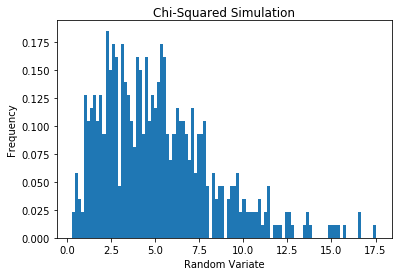

In [10]:
plot_chi_squared(5, 500);

Use `interact` to explore the `plot_chi_squared` function interactively with `k` in the interval $[0,10]$ and `samples` in the interval $[20,400]$ by steps of 20.

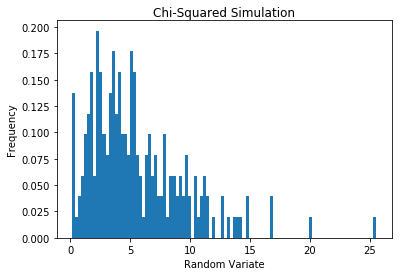

In [11]:
interact(plot_chi_squared, k=(0,10), samples=(20, 400, 20));